In [1]:
import pandas as pd

In [2]:
df_acc = pd.read_csv('/home/darshan/Documents/accounts_24_dec.csv')

df_acc = df_acc.iloc[:, 1:]

df_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147845 entries, 0 to 147844
Data columns (total 61 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   base_source                                                     147845 non-null  object 
 1   Has Opportunity?                                                147845 non-null  object 
 2   madison_logics_leads_aggregated                                 147845 non-null  float64
 3   madison_logics_display_impressions_aggregated                   147845 non-null  float64
 4   madison_logics_clicks_aggregated                                147845 non-null  float64
 5   madison_logics_click_through_rate_aggregated                    147845 non-null  float64
 6   madison_logics_exposure_time_minutes_aggregated                 147845 non-null  float64
 7   madison_logics_site_visits_aggregated 

In [3]:
df_acc['Has Opportunity?'].value_counts()

Has Opportunity?
No     142921
Yes      4924
Name: count, dtype: int64

In [4]:
df_acc_with_opp = df_acc[df_acc['Has Opportunity?'] == 'Yes']

df_acc_with_opp.shape

(4924, 61)

In [5]:
df_acc_without_opp = df_acc[df_acc['Has Opportunity?'] == 'No']

df_acc_without_opp.shape

(142921, 61)

In [6]:
df_acc_without_opp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142921 entries, 0 to 147844
Data columns (total 61 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   base_source                                                     142921 non-null  object 
 1   Has Opportunity?                                                142921 non-null  object 
 2   madison_logics_leads_aggregated                                 142921 non-null  float64
 3   madison_logics_display_impressions_aggregated                   142921 non-null  float64
 4   madison_logics_clicks_aggregated                                142921 non-null  float64
 5   madison_logics_click_through_rate_aggregated                    142921 non-null  float64
 6   madison_logics_exposure_time_minutes_aggregated                 142921 non-null  float64
 7   madison_logics_site_visits_aggregated      

In [7]:
df_acc_without_opp.sample(10)

,base_source,Has Opportunity?,madison_logics_leads_aggregated,madison_logics_display_impressions_aggregated,madison_logics_clicks_aggregated,madison_logics_click_through_rate_aggregated,madison_logics_exposure_time_minutes_aggregated,madison_logics_site_visits_aggregated,madison_logics_exposure_time_per_site_visit_minutes_aggregated,outreach_calls_total_calls,...,past_opportunity_count,past_Closed Lost_count,past_Closed Won_count,past_Discovery_count,past_Proposal_count,past_Meeting_count,past_Final Negotiation_count,past_Design_count,past_Active Dialogue_count,score
96347,Other Accounts,No,0.0,0.0,0.0,0.00,0.00,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0.0
27307,Other Accounts,No,0.0,1242.0,3.0,0.24,225.54,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0.0
1141,Other Accounts,No,0.0,0.0,0.0,0.00,0.00,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0.0
23401,Other Accounts,No,0.0,0.0,0.0,0.00,0.00,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0.0
133178,Other Accounts,No,0.0,0.0,0.0,0.00,0.00,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0.0
78153,Target TAL Accounts,No,0.0,1633.0,0.0,0.00,99.17,60.0,1.653333,0.0,...,0,0,0,0,0,0,0,0,0,0.0
80648,Other Accounts,No,0.0,0.0,0.0,0.00,0.00,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0.0
6577,Other Accounts,No,0.0,0.0,0.0,0.00,0.00,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0.0
84417,Other Accounts,No,0.0,0.0,0.0,0.00,0.00,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0.0
28715,Other Accounts,No,0.0,0.0,0.0,0.00,0.00,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0.0


In [8]:
df_temp = df_acc_without_opp.loc[~(df_acc_without_opp.select_dtypes(exclude='object') == 0).all(axis=1)]

df_temp.shape

(142779, 61)

In [9]:
df_acc_without_opp_without_zero = df_acc_without_opp.replace(0, pd.NA)
df_acc_without_opp_without_zero.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142921 entries, 0 to 147844
Data columns (total 61 columns):
 #   Column                                                          Non-Null Count   Dtype 
---  ------                                                          --------------   ----- 
 0   base_source                                                     142921 non-null  object
 1   Has Opportunity?                                                142921 non-null  object
 2   madison_logics_leads_aggregated                                 595 non-null     object
 3   madison_logics_display_impressions_aggregated                   13469 non-null   object
 4   madison_logics_clicks_aggregated                                4833 non-null    object
 5   madison_logics_click_through_rate_aggregated                    4833 non-null    object
 6   madison_logics_exposure_time_minutes_aggregated                 13306 non-null   object
 7   madison_logics_site_visits_aggregated               

In [10]:
row_count = df_acc_without_opp_without_zero.dropna(subset=['outreach_calls_inbound_calls']).shape[0]
print(row_count)

58


In [11]:
# List of target columns
columns_to_check = [
    'madison_logics_leads_aggregated',
    'madison_logics_display_impressions_aggregated',
    'madison_logics_clicks_aggregated',
    'madison_logics_click_through_rate_aggregated',
    'madison_logics_exposure_time_minutes_aggregated',
    'madison_logics_site_visits_aggregated',
    'madison_logics_exposure_time_per_site_visit_minutes_aggregated',
    'outreach_calls_total_calls',
    'outreach_calls_outbound_calls',
    'outreach_calls_inbound_calls',
    'outreach_calls_answered_calls',
    'outreach_calls_total_answered_duration',
    'outreach_calls_avg_answered_duration',
    'outreach_calls_min_call_duration',
    'outreach_calls_max_call_duration',
    'outreach_emails_frequency',
    'outreach_emails_open_count',
    'outreach_emails_open_rate',
    'outreach_emails_click_count',
    'outreach_emails_click_rate',
    'outreach_emails_single_mail_count',
    'outreach_emails_sequence_mail_count',
    'outreach_emails_campaign_mail_count',
    'outreach_emails_average_time_required_to_reply',
    'outreach_emails_avg_response_rate'
]

df_tal_acc_without_opp_without_zero = df_acc_without_opp_without_zero[df_acc_without_opp_without_zero['base_source'] == 'Target TAL Accounts']
# Count non-null values for each row in the specified columns
df_tal_acc_without_opp_without_zero['non_null_count'] = df_tal_acc_without_opp_without_zero[columns_to_check].notna().sum(axis=1)

df_tal_acc_without_opp_without_zero.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16038 entries, 9 to 147837
Data columns (total 62 columns):
 #   Column                                                          Non-Null Count  Dtype 
---  ------                                                          --------------  ----- 
 0   base_source                                                     16038 non-null  object
 1   Has Opportunity?                                                16038 non-null  object
 2   madison_logics_leads_aggregated                                 507 non-null    object
 3   madison_logics_display_impressions_aggregated                   8732 non-null   object
 4   madison_logics_clicks_aggregated                                3502 non-null   object
 5   madison_logics_click_through_rate_aggregated                    3502 non-null   object
 6   madison_logics_exposure_time_minutes_aggregated                 8620 non-null   object
 7   madison_logics_site_visits_aggregated                         

/tmp/ipykernel_61821/74013767.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tal_acc_without_opp_without_zero['non_null_count'] = df_tal_acc_without_opp_without_zero[columns_to_check].notna().sum(axis=1)


In [12]:
# Sort rows by non-null count in descending order
sorted_df = df_tal_acc_without_opp_without_zero.sort_values(by='non_null_count', ascending=False)

# Select the top 5000 rows
top_5000_df = sorted_df.head(5000)

# Drop the helper column
top_5000_df = top_5000_df.drop(columns=['non_null_count'])

top_5000_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 51676 to 89518
Data columns (total 61 columns):
 #   Column                                                          Non-Null Count  Dtype 
---  ------                                                          --------------  ----- 
 0   base_source                                                     5000 non-null   object
 1   Has Opportunity?                                                5000 non-null   object
 2   madison_logics_leads_aggregated                                 457 non-null    object
 3   madison_logics_display_impressions_aggregated                   4175 non-null   object
 4   madison_logics_clicks_aggregated                                3012 non-null   object
 5   madison_logics_click_through_rate_aggregated                    3012 non-null   object
 6   madison_logics_exposure_time_minutes_aggregated                 4150 non-null   object
 7   madison_logics_site_visits_aggregated                       

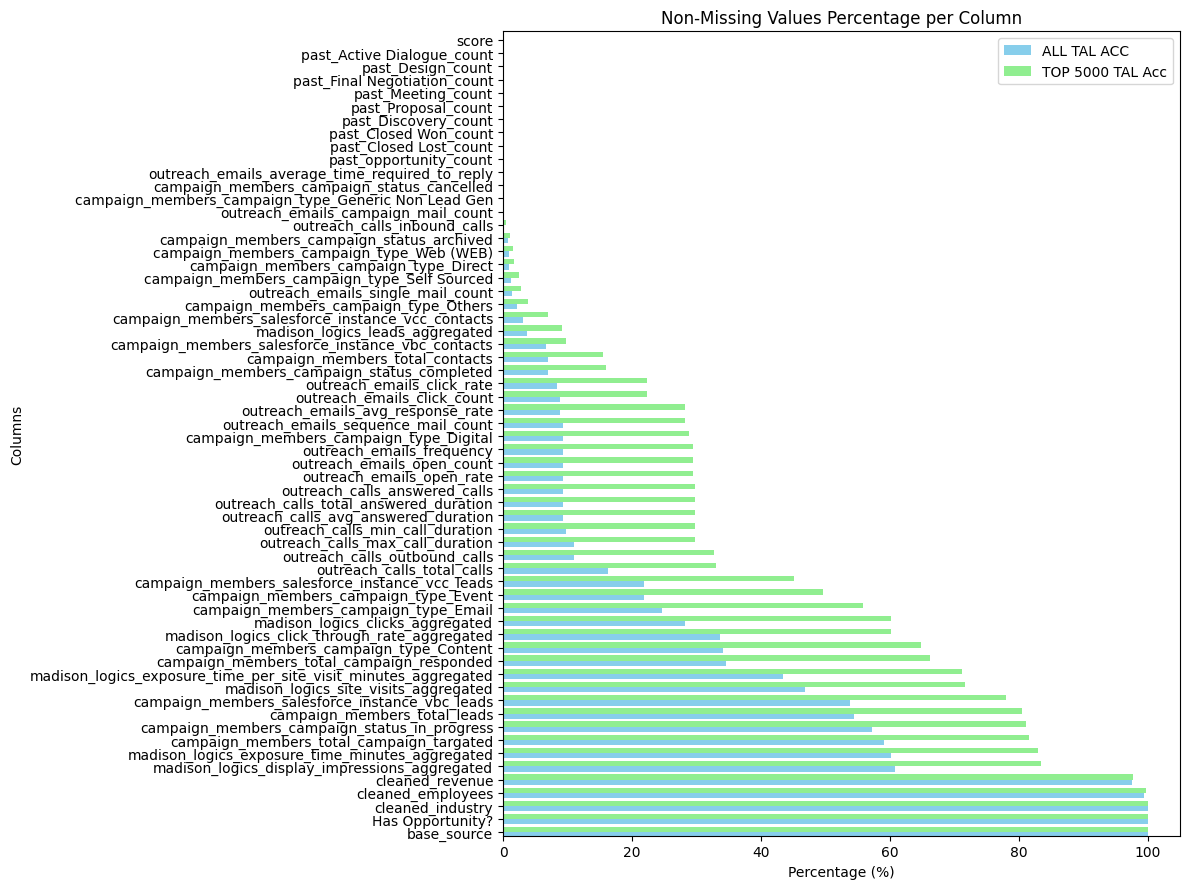

In [13]:
import matplotlib.pyplot as plt

# Non-Missing Values Plot for df_tal_acc_without_opp_without_zero and top_5000_df
# For df_tal_acc_without_opp_without_zero
non_missing_values_report = df_tal_acc_without_opp_without_zero.drop(columns=['non_null_count']).notna().sum()
non_missing_values_percentage = (non_missing_values_report / len(df_tal_acc_without_opp_without_zero)) * 100
non_missing_values_summary = pd.DataFrame({'Non-Missing Values Percentage': non_missing_values_percentage})
non_missing_values_summary = non_missing_values_summary.sort_values(by='Non-Missing Values Percentage', ascending=False)

# For top_5000_df
non_missing_values_report_top_5000 = top_5000_df.notna().sum()
non_missing_values_percentage_top_5000 = (non_missing_values_report_top_5000 / len(top_5000_df)) * 100
non_missing_values_summary_top_5000 = pd.DataFrame({'Non-Missing Values Percentage': non_missing_values_percentage_top_5000})
non_missing_values_summary_top_5000 = non_missing_values_summary_top_5000.sort_values(by='Non-Missing Values Percentage', ascending=False)

# Create a figure for Non-Missing Values Plot
fig1, ax1 = plt.subplots(figsize=(12, 9))

# Plot Non-Missing values for both DataFrames in the same plot
non_missing_values_summary['Non-Missing Values Percentage'].plot(kind='barh', color='skyblue', ax=ax1, position=1, width=0.4, label='ALL TAL ACC')
non_missing_values_summary_top_5000['Non-Missing Values Percentage'].plot(kind='barh', color='lightgreen', ax=ax1, position=0, width=0.4, label='TOP 5000 TAL Acc')

ax1.set_title('Non-Missing Values Percentage per Column')
ax1.set_xlabel('Percentage (%)')
ax1.set_ylabel('Columns')
ax1.legend()

# Show both figures
plt.tight_layout()
plt.show()


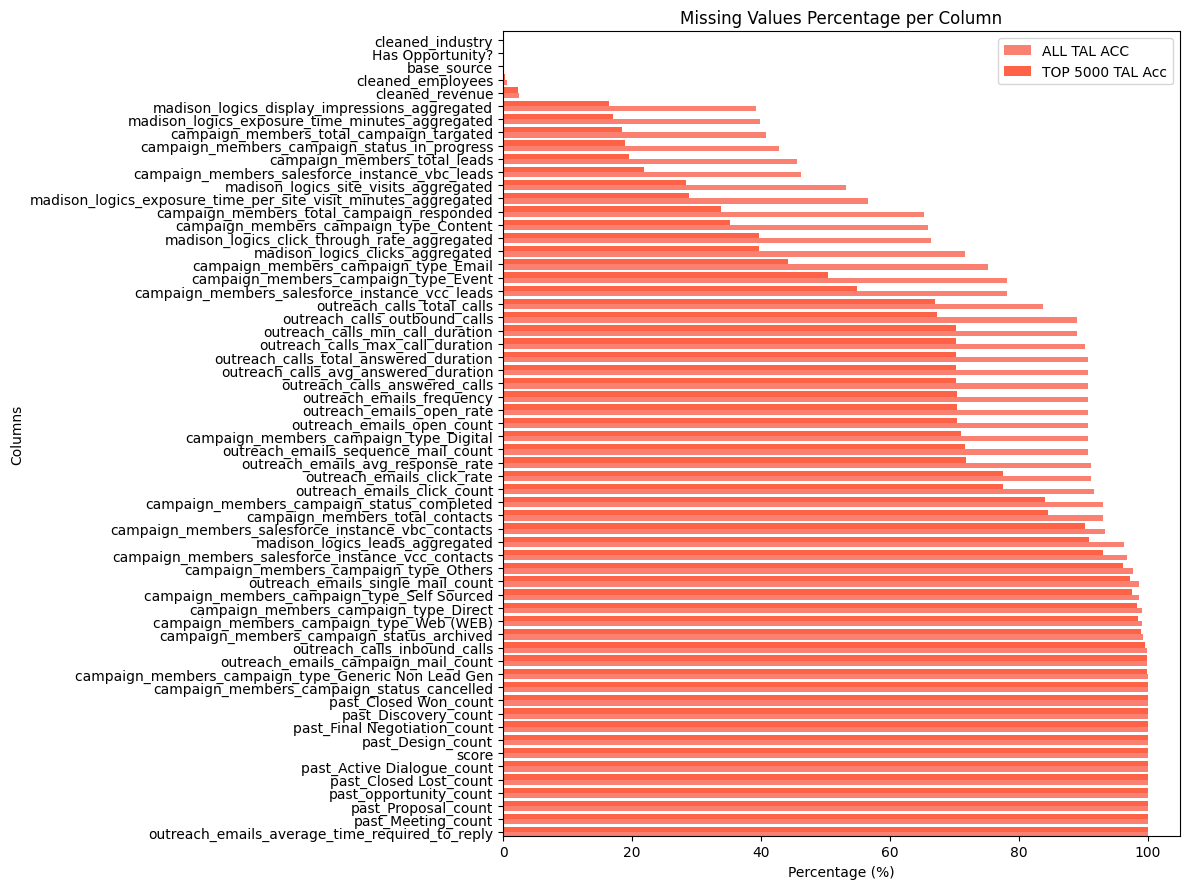

In [14]:
# Create a figure for Missing Values Plot
fig2, ax2 = plt.subplots(figsize=(12, 9))

# Missing Values Plot for df_tal_acc_without_opp_without_zero and top_5000_df
# For df_tal_acc_without_opp_without_zero
missing_values_report = df_tal_acc_without_opp_without_zero.drop(columns=['non_null_count']).isna().sum()
missing_values_percentage = (missing_values_report / len(df_tal_acc_without_opp_without_zero)) * 100
missing_values_summary = pd.DataFrame({'Missing Values Percentage': missing_values_percentage})
missing_values_summary = missing_values_summary.sort_values(by='Missing Values Percentage', ascending=False)

# For top_5000_df
missing_values_report_top_5000 = top_5000_df.isna().sum()
missing_values_percentage_top_5000 = (missing_values_report_top_5000 / len(top_5000_df)) * 100
missing_values_summary_top_5000 = pd.DataFrame({'Missing Values Percentage': missing_values_percentage_top_5000})
missing_values_summary_top_5000 = missing_values_summary_top_5000.sort_values(by='Missing Values Percentage', ascending=False)

# Plot Missing values for both DataFrames in the same plot with distinct colors
missing_values_summary['Missing Values Percentage'].plot(kind='barh', color='salmon', ax=ax2, position=1, width=0.4, label='ALL TAL ACC')
missing_values_summary_top_5000['Missing Values Percentage'].plot(kind='barh', color='tomato', ax=ax2, position=0, width=0.4, label='TOP 5000 TAL Acc')

ax2.set_title('Missing Values Percentage per Column')
ax2.set_xlabel('Percentage (%)')
ax2.set_ylabel('Columns')
ax2.legend()

# Show both figures
plt.tight_layout()
plt.show()


In [15]:
import hashlib

def create_unique_key(df):
    # Concatenate all values in each row to form a unique string
    df['unique_key'] = df.apply(lambda row: hashlib.md5(row.astype(str).sum().encode()).hexdigest(), axis=1)
    return df

# Apply the function
df_tal_acc_without_opp_without_zero = create_unique_key(df_tal_acc_without_opp_without_zero)

df_tal_acc_without_opp_without_zero.shape

/tmp/ipykernel_61821/2842437087.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unique_key'] = df.apply(lambda row: hashlib.md5(row.astype(str).sum().encode()).hexdigest(), axis=1)


(16038, 63)

In [16]:
def filter_and_order(df, column_name, percentage):
    # Check if the column is of object type, skip numeric columns
    if pd.api.types.is_numeric_dtype(df[column_name]):
        return None
    
    # Sort the dataframe by the given column in descending order
    df = df.sort_values(by=column_name, ascending=False)
    
    # Calculate the number of rows based on the given percentage
    num_rows = int(len(df) * (percentage / 100))
    
    # Select the top {percentage} records
    df = df.head(num_rows)
    
    # Remove rows where the column contains 0 or NA values
    df = df[df[column_name].notna() & (df[column_name] != 0)]
    
    return df

In [17]:
# List of target columns
columns_to_check = [
    'madison_logics_leads_aggregated',
    'madison_logics_display_impressions_aggregated',
    'madison_logics_clicks_aggregated',
    'madison_logics_click_through_rate_aggregated',
    'madison_logics_exposure_time_minutes_aggregated',
    'madison_logics_site_visits_aggregated',
    'madison_logics_exposure_time_per_site_visit_minutes_aggregated',
    'outreach_calls_total_calls',
    'outreach_calls_outbound_calls',
    'outreach_calls_inbound_calls',
    'outreach_calls_answered_calls',
    'outreach_calls_total_answered_duration',
    'outreach_calls_avg_answered_duration',
    'outreach_calls_min_call_duration',
    'outreach_calls_max_call_duration',
    'outreach_emails_frequency',
    'outreach_emails_open_count',
    'outreach_emails_open_rate',
    'outreach_emails_click_count',
    'outreach_emails_click_rate',
    'outreach_emails_single_mail_count',
    'outreach_emails_sequence_mail_count',
    'outreach_emails_campaign_mail_count',
    'outreach_emails_average_time_required_to_reply',
    'outreach_emails_avg_response_rate'
]

print("df_tal_acc_without_opp_without_zero: ",df_tal_acc_without_opp_without_zero.shape)
final_df = pd.DataFrame()  # Initialize an empty DataFrame to store the results

for column in columns_to_check:
    filtered_df = filter_and_order(df_tal_acc_without_opp_without_zero, column, 20)
    if filtered_df is not None:
        final_df = pd.concat([final_df, filtered_df], ignore_index=True)  # Concatenate each result

final_df.info()  # Display the final concatenated DataFrame information

df_tal_acc_without_opp_without_zero:  (16038, 63)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40414 entries, 0 to 40413
Data columns (total 63 columns):
 #   Column                                                          Non-Null Count  Dtype 
---  ------                                                          --------------  ----- 
 0   base_source                                                     40414 non-null  object
 1   Has Opportunity?                                                40414 non-null  object
 2   madison_logics_leads_aggregated                                 3512 non-null   object
 3   madison_logics_display_impressions_aggregated                   33713 non-null  object
 4   madison_logics_clicks_aggregated                                22396 non-null  object
 5   madison_logics_click_through_rate_aggregated                    22396 non-null  object
 6   madison_logics_exposure_time_minutes_aggregated                 33522 non-null  object
 7   madison_

In [18]:
# Get unique rows based on the 'unique_key' column
final_df_unique = final_df.drop_duplicates(subset='unique_key', keep='first')

final_df_unique.info()  # Display the unique DataFrame information

<class 'pandas.core.frame.DataFrame'>
Index: 7245 entries, 0 to 32214
Data columns (total 63 columns):
 #   Column                                                          Non-Null Count  Dtype 
---  ------                                                          --------------  ----- 
 0   base_source                                                     7245 non-null   object
 1   Has Opportunity?                                                7245 non-null   object
 2   madison_logics_leads_aggregated                                 507 non-null    object
 3   madison_logics_display_impressions_aggregated                   6238 non-null   object
 4   madison_logics_clicks_aggregated                                3501 non-null   object
 5   madison_logics_click_through_rate_aggregated                    3501 non-null   object
 6   madison_logics_exposure_time_minutes_aggregated                 6207 non-null   object
 7   madison_logics_site_visits_aggregated                           

In [19]:
# Concatenate the unique `final_df` with `df_acc_with_opp`
combined_df = pd.concat([final_df_unique, df_acc_with_opp], ignore_index=True)

# Drop 'non_null_count' and 'unique_key' columns from the combined DataFrame
combined_df = combined_df.drop(columns=['non_null_count', 'unique_key'], errors='ignore')

# combined_df.to_csv('/home/darshan/Downloads/acc_24_dec_20_percent.csv')

# Display the updated DataFrame information
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12169 entries, 0 to 12168
Data columns (total 61 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   base_source                                                     12169 non-null  object 
 1   Has Opportunity?                                                12169 non-null  object 
 2   madison_logics_leads_aggregated                                 5431 non-null   object 
 3   madison_logics_display_impressions_aggregated                   11162 non-null  object 
 4   madison_logics_clicks_aggregated                                8425 non-null   object 
 5   madison_logics_click_through_rate_aggregated                    8425 non-null   object 
 6   madison_logics_exposure_time_minutes_aggregated                 11131 non-null  object 
 7   madison_logics_site_visits_aggregated            

/tmp/ipykernel_61821/2511498305.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat([final_df_unique, df_acc_with_opp], ignore_index=True)


# Regression Model on Opportunity Data

In [20]:
df_acc_with_opp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4924 entries, 43 to 147822
Data columns (total 61 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   base_source                                                     4924 non-null   object 
 1   Has Opportunity?                                                4924 non-null   object 
 2   madison_logics_leads_aggregated                                 4924 non-null   float64
 3   madison_logics_display_impressions_aggregated                   4924 non-null   float64
 4   madison_logics_clicks_aggregated                                4924 non-null   float64
 5   madison_logics_click_through_rate_aggregated                    4924 non-null   float64
 6   madison_logics_exposure_time_minutes_aggregated                 4924 non-null   float64
 7   madison_logics_site_visits_aggregated                

In [23]:
df_acc_with_opp_req_cln = df_acc_with_opp[[
                 'outreach_calls_total_calls',
                 'outreach_calls_outbound_calls',
                 'outreach_calls_inbound_calls',
                 'outreach_calls_answered_calls',
                 'outreach_calls_total_answered_duration',
                 'outreach_emails_frequency',
                 'outreach_emails_open_count',
                 'cleaned_employees',
                 'cleaned_revenue',
                 'campaign_members_total_campaign_targated',
                 'campaign_members_total_campaign_responded',
                 'campaign_members_total_leads',
                 'campaign_members_total_contacts',
                 'past_opportunity_count',
                 'past_Closed Lost_count',
                 'past_Closed Won_count',
                 'past_Discovery_count',
                 'past_Proposal_count',
                 'past_Meeting_count',
                 'past_Final Negotiation_count',
                 'past_Design_count',
                 'past_Active Dialogue_count',
                 'score',
                ]]


df_acc_with_opp_req_cln.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4924 entries, 43 to 147822
Data columns (total 23 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   outreach_calls_total_calls                 4924 non-null   float64
 1   outreach_calls_outbound_calls              4924 non-null   float64
 2   outreach_calls_inbound_calls               4924 non-null   float64
 3   outreach_calls_answered_calls              4924 non-null   float64
 4   outreach_calls_total_answered_duration     4924 non-null   float64
 5   outreach_emails_frequency                  4924 non-null   float64
 6   outreach_emails_open_count                 4924 non-null   float64
 7   cleaned_employees                          4924 non-null   float64
 8   cleaned_revenue                            4924 non-null   float64
 9   campaign_members_total_campaign_targated   4924 non-null   float64
 10  campaign_members_total_cam

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
import xgboost
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Separate features and target
X = df_acc_with_opp_req_cln.drop(columns=['score'])
y = df_acc_with_opp_req_cln['score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the splits
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (3939, 22)
Testing features shape: (985, 22)
Training target shape: (3939,)
Testing target shape: (985,)


## Random Forest

In [28]:
# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.4f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.4f}")
print(f"R-squared Score (R2): {r2_score(y_test, y_pred):.4f}")

Mean Squared Error (MSE): 0.0013
Mean Absolute Error (MAE): 0.0036
R-squared Score (R2): 1.0000


/tmp/ipykernel_61821/2529268746.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


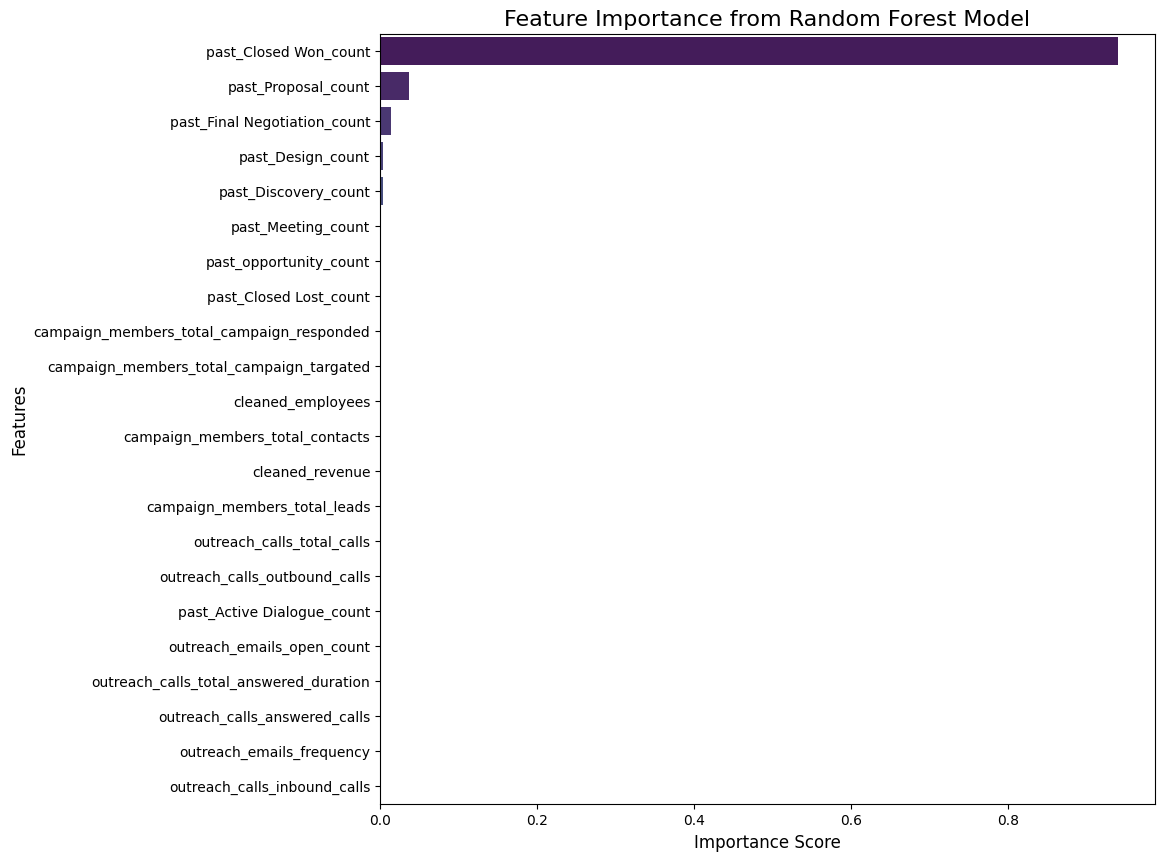

In [31]:
# Calculate feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for the feature importances
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances using Seaborn
plt.figure(figsize=(10, 10))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance from Random Forest Model', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()